In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# 한글 font 설정
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
plt.rc('font',family = font_name)
mpl.rcParams['axes.unicode_minus'] = False

# 컬럼을 다 보여주는 함수
from IPython.display import display
pd.options.display.max_columns = None

---

# < 데이터 분석 및 시각화 >

## 정제 파일 market_df_final.csv 불러오기

In [4]:
market_df = pd.read_csv("market_df_final.csv", engine='python', encoding="utf-8")
market_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171016 entries, 0 to 171015
Data columns (total 28 columns):
기준_년월_코드           171016 non-null int64
상권_코드              171016 non-null int64
상권_코드_명            171016 non-null object
서비스_업종_코드          171016 non-null object
서비스_업종_코드_명        171016 non-null object
당월_매출_금액           171016 non-null int64
당월_매출_건수           171016 non-null int64
점포                 171016 non-null int64
총_상주인구_수           171016 non-null float64
총_가구_수             171016 non-null float64
아파트_가구_수           171016 non-null float64
비_아파트_가구_수         171016 non-null float64
월_평균_소득_금액         171016 non-null float64
집객시설_수             171016 non-null float64
총_유동인구_수           171016 non-null float64
ratio_index        171016 non-null float64
price_index        171016 non-null float64
count_index        171016 non-null float64
fpop_index         171016 non-null float64
work_pop_index     171016 non-null float64
com_group          171016 non-null int64
년

In [3]:
display(market_df.head())

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,ratio_index,price_index,count_index,fpop_index,work_pop_index,com_group,년도,월,점포별평균당월매출금액,점포별평균당월매출건수,전월_대비_매출_금액_변화량,전월_대비_매출_건수_변화량,전월_대비_유동인구수_변화량
0,201501,11947,당산로44길,CS100001,한식음식점,96722641,4527,2,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.393192,0.034538,0.037737,0.191638,0.026806,1,2015,1,48361320.5,2263.5,2.524133e+06,120.64,-513.0
1,201501,11947,당산로44길,CS100004,양식집,14242932,910,1,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.387926,0.009337,0.007279,0.191638,0.026806,1,2015,1,14242932.0,910.0,2.524133e+06,120.64,-513.0
2,201501,11947,당산로44길,CS100005,분식집,5084735,653,1,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.337953,0.006569,0.005180,0.191638,0.026806,1,2015,1,5084735.0,653.0,2.524133e+06,120.64,-513.0
3,201501,11947,당산로44길,CS100006,패스트푸드점,18820989,2098,2,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.418138,0.010767,0.017285,0.191638,0.026806,1,2015,1,9410494.5,1049.0,2.524133e+06,120.64,-513.0
4,201501,11947,당산로44길,CS100008,제과점,124446237,11102,2,194.0,84.0,84.0,0.0,460.0,10.0,11239.0,0.388390,0.042664,0.089434,0.191638,0.026806,1,2015,1,62223118.5,5551.0,2.524133e+06,120.64,-513.0


## 2년간 상권별 매출 금액/건수 상위 5위 확인

Text(0, 0.5, '총 매출 건수')

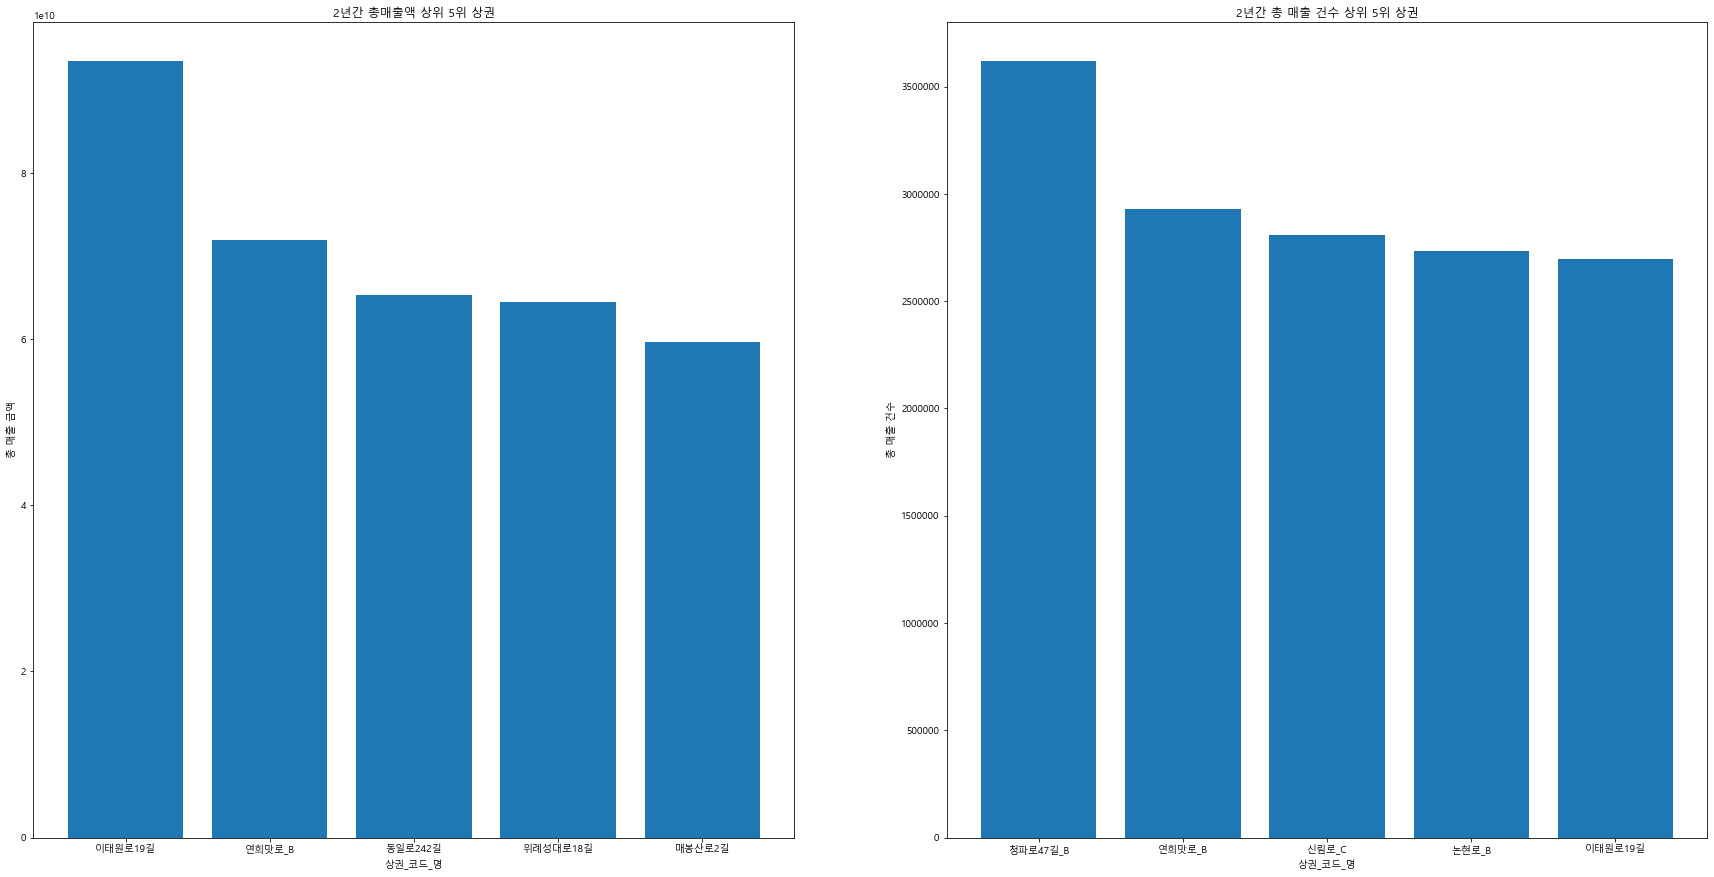

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(30, 15))

com_month_sales = pd.DataFrame(market_df.groupby(['상권_코드_명'])['당월_매출_금액'].sum()).sort_values(by='당월_매출_금액',ascending=False).reset_index().head(5)

ax[0].bar(com_month_sales['상권_코드_명'], com_month_sales['당월_매출_금액'])

ax[0].set_title('2년간 총매출액 상위 5위 상권')
ax[0].set_xlabel('상권_코드_명')
ax[0].set_ylabel('총 매출 금액')

count_2year = pd.DataFrame(market_df.groupby(['상권_코드_명'])['당월_매출_건수'].sum()).sort_values(by='당월_매출_건수', ascending=False).reset_index().head(5)

ax[1].bar(count_2year['상권_코드_명'], count_2year['당월_매출_건수'])

ax[1].set_title('2년간 총 매출 건수 상위 5위 상권')
ax[1].set_xlabel('상권_코드_명')
ax[1].set_ylabel('총 매출 건수')

### 상위 상권 업종별 점포 비율

+ 매출금액 top : 이태원로19길

+ 매출건수 top : 청파로47길_B

In [50]:
market_df1 = market_df[market_df["상권_코드_명"]=="이태원로19길"].reset_index(drop=True)
market_df1.tail(1)

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,ratio_index,price_index,count_index,fpop_index,work_pop_index,com_group,년도,월,점포별평균당월매출금액,점포별평균당월매출건수,전월_대비_매출_금액_변화량,전월_대비_매출_건수_변화량,전월_대비_유동인구수_변화량
192,201612,12764,이태원로19길,CS100010,호프간이주점,135897553,3259,5,625.0,381.0,0.0,381.0,874.0,2.0,2492.0,0.540285,0.048365,0.031288,0.045408,0.076732,2,2016,12,27179510.6,651.8,9.422622e+07,2419.5,26.0


In [51]:
market_df1 = market_df1[market_df1["기준_년월_코드"]==201612]
market_df1.head()

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,ratio_index,price_index,count_index,fpop_index,work_pop_index,com_group,년도,월,점포별평균당월매출금액,점포별평균당월매출건수,전월_대비_매출_금액_변화량,전월_대비_매출_건수_변화량,전월_대비_유동인구수_변화량
185,201612,12764,이태원로19길,CS100001,한식음식점,1477910927,26390,25,625.0,381.0,0.0,381.0,874.0,2.0,2492.0,0.504612,0.427765,0.234095,0.045408,0.076732,2,2016,12,5.911644e+07,1055.600000,9.422622e+07,2419.5,26.0
186,201612,12764,이태원로19길,CS100003,일식집,90688780,1931,3,625.0,381.0,0.0,381.0,874.0,2.0,2492.0,0.529019,0.032719,0.018229,0.045408,0.076732,2,2016,12,3.022959e+07,643.666667,9.422622e+07,2419.5,26.0
187,201612,12764,이태원로19길,CS100004,양식집,3306998190,104527,39,625.0,381.0,0.0,381.0,874.0,2.0,2492.0,0.498660,1.000000,0.947048,0.045408,0.076732,2,2016,12,8.479483e+07,2680.179487,9.422622e+07,2419.5,26.0
188,201612,12764,이태원로19길,CS100005,분식집,27756085,742,1,625.0,381.0,0.0,381.0,874.0,2.0,2492.0,0.507667,0.014787,0.007336,0.045408,0.076732,2,2016,12,2.775608e+07,742.000000,9.422622e+07,2419.5,26.0
189,201612,12764,이태원로19길,CS100006,패스트푸드점,6516667,511,1,625.0,381.0,0.0,381.0,874.0,2.0,2492.0,0.501019,0.006753,0.004084,0.045408,0.076732,2,2016,12,6.516667e+06,511.000000,9.422622e+07,2419.5,26.0


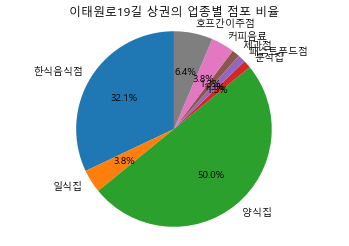

In [40]:
labels = list(market_df1["서비스_업종_코드_명"])
store = list(market_df1["점포"])

plt.pie(store, labels=labels, autopct="%1.1f%%", shadow=False, startangle=90)

plt.axis('equal')
plt.title('이태원로19길 상권의 업종별 점포 비율')
plt.show()

In [52]:
market_df2 = market_df[market_df["상권_코드_명"]=="청파로47길_B"].reset_index(drop=True)
market_df2.tail(1)

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,ratio_index,price_index,count_index,fpop_index,work_pop_index,com_group,년도,월,점포별평균당월매출금액,점포별평균당월매출건수,전월_대비_매출_금액_변화량,전월_대비_매출_건수_변화량,전월_대비_유동인구수_변화량
239,201612,12631,청파로47길_B,CS100010,호프간이주점,45973063,4674,3,1170.0,596.95,0.0,596.95,479.0,8.0,3348.0,0.44445,0.021775,0.040232,0.056395,0.053762,2,2016,12,1.532435e+07,1558.0,-2.053978e+06,-689.696581,-211.0


In [53]:
market_df2 = market_df2[market_df2["기준_년월_코드"]==201612]
market_df2.head()

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,ratio_index,price_index,count_index,fpop_index,work_pop_index,com_group,년도,월,점포별평균당월매출금액,점포별평균당월매출건수,전월_대비_매출_금액_변화량,전월_대비_매출_건수_변화량,전월_대비_유동인구수_변화량
230,201612,12631,청파로47길_B,CS100001,한식음식점,379672331,39689,15,1170.0,596.95,0.0,596.95,479.0,8.0,3348.0,0.432063,0.145849,0.343897,0.056395,0.053762,2,2016,12,2.531149e+07,2645.933333,-2.053978e+06,-689.696581,-211.0
231,201612,12631,청파로47길_B,CS100002,중국집,88538253,4938,3,1170.0,596.95,0.0,596.95,479.0,8.0,3348.0,0.401853,0.033302,0.040949,0.056395,0.053762,2,2016,12,2.951275e+07,1646.000000,-2.053978e+06,-689.696581,-211.0
232,201612,12631,청파로47길_B,CS100003,일식집,75297201,6328,4,1170.0,596.95,0.0,596.95,479.0,8.0,3348.0,0.421553,0.035252,0.056050,0.056395,0.053762,2,2016,12,1.882430e+07,1582.000000,-2.053978e+06,-689.696581,-211.0
233,201612,12631,청파로47길_B,CS100004,양식집,210389876,21921,17,1170.0,596.95,0.0,596.95,479.0,8.0,3348.0,0.411339,0.070262,0.176390,0.056395,0.053762,2,2016,12,1.237588e+07,1289.470588,-2.053978e+06,-689.696581,-211.0
234,201612,12631,청파로47길_B,CS100005,분식집,161405682,18017,10,1170.0,596.95,0.0,596.95,479.0,8.0,3348.0,0.413052,0.057420,0.146991,0.056395,0.053762,2,2016,12,1.614057e+07,1801.700000,-2.053978e+06,-689.696581,-211.0


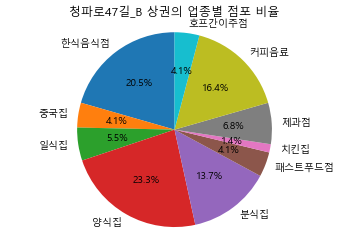

In [42]:
labels = list(market_df2["서비스_업종_코드_명"])
store = list(market_df2["점포"])

plt.pie(store, labels=labels, autopct="%1.1f%%", shadow=False, startangle=90)

plt.axis('equal')
plt.title('청파로47길_B 상권의 업종별 점포 비율')
plt.show()

### 전월 대비 매출 금액/건수 변화 파악

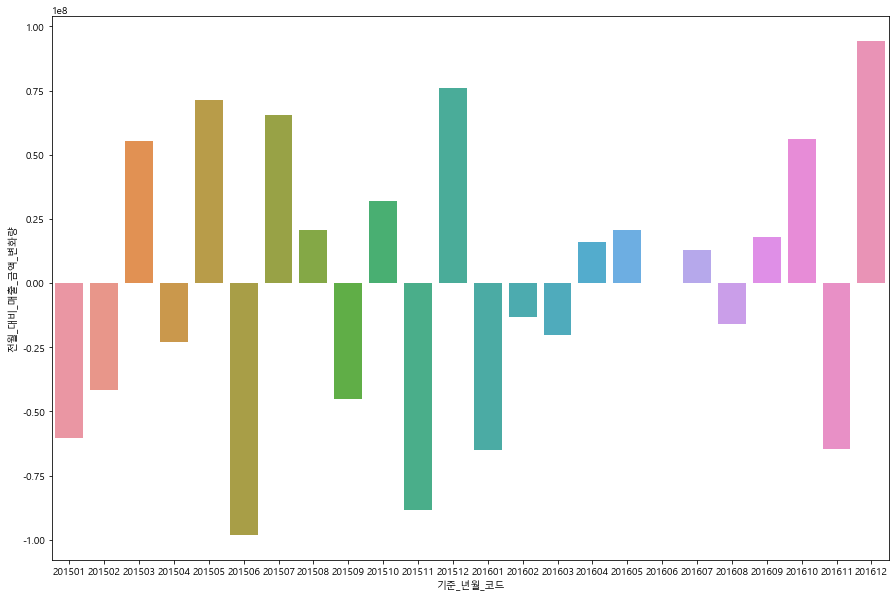

In [7]:
plt.figure(figsize=(15, 10))
sns.barplot(x="기준_년월_코드", y="전월_대비_매출_금액_변화량", data=market_df1)

In [8]:
market_df2 = market_df[market_df["상권_코드_명"]=="청파로47길_B"].reset_index()
del market_df2["index"]
market_df2.head()

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,ratio_index,price_index,count_index,fpop_index,work_pop_index,com_group,년도,월,점포별평균당월매출금액,점포별평균당월매출건수,전월_대비_매출_금액_변화량,전월_대비_매출_건수_변화량,전월_대비_유동인구수_변화량
0,201501,12631,청파로47길_B,CS100001,한식음식점,205337205,15352,14,1247.0,621.0,0.0,621.0,597.0,8.0,4586.0,0.395432,0.068343,0.121474,0.077495,0.042672,2,2015,1,1.466694e+07,1096.571429,-2.457726e+07,-3409.62963,-263.0
1,201501,12631,청파로47길_B,CS100002,중국집,54349692,2971,2,1247.0,621.0,0.0,621.0,597.0,8.0,4586.0,0.369305,0.020256,0.022480,0.077495,0.042672,2,2015,1,2.717485e+07,1485.500000,-2.457726e+07,-3409.62963,-263.0
2,201501,12631,청파로47길_B,CS100003,일식집,53057783,4281,3,1247.0,621.0,0.0,621.0,597.0,8.0,4586.0,0.376748,0.020571,0.033032,0.077495,0.042672,2,2015,1,1.768593e+07,1427.000000,-2.457726e+07,-3409.62963,-263.0
3,201501,12631,청파로47길_B,CS100004,양식집,145939641,11621,12,1247.0,621.0,0.0,621.0,597.0,8.0,4586.0,0.415541,0.046058,0.090959,0.077495,0.042672,2,2015,1,1.216164e+07,968.416667,-2.457726e+07,-3409.62963,-263.0
4,201501,12631,청파로47길_B,CS100005,분식집,109180047,14283,11,1247.0,621.0,0.0,621.0,597.0,8.0,4586.0,0.396004,0.037478,0.109954,0.077495,0.042672,2,2015,1,9.925459e+06,1298.454545,-2.457726e+07,-3409.62963,-263.0


In [9]:
market_df2.groupby(["기준_년월_코드", "상권_코드_명"])[["전월_대비_매출_건수_변화량"]].mean()

,,전월_대비_매출_건수_변화량
기준_년월_코드,상권_코드_명,
201501,청파로47길_B,-3409.629630
201502,청파로47길_B,-1340.037037
201503,청파로47길_B,6779.518519
201504,청파로47길_B,667.296296
201505,청파로47길_B,-807.518519
201506,청파로47길_B,-453.888889
201507,청파로47길_B,-4286.740741
201508,청파로47길_B,-190.888889
201509,청파로47길_B,4188.685185


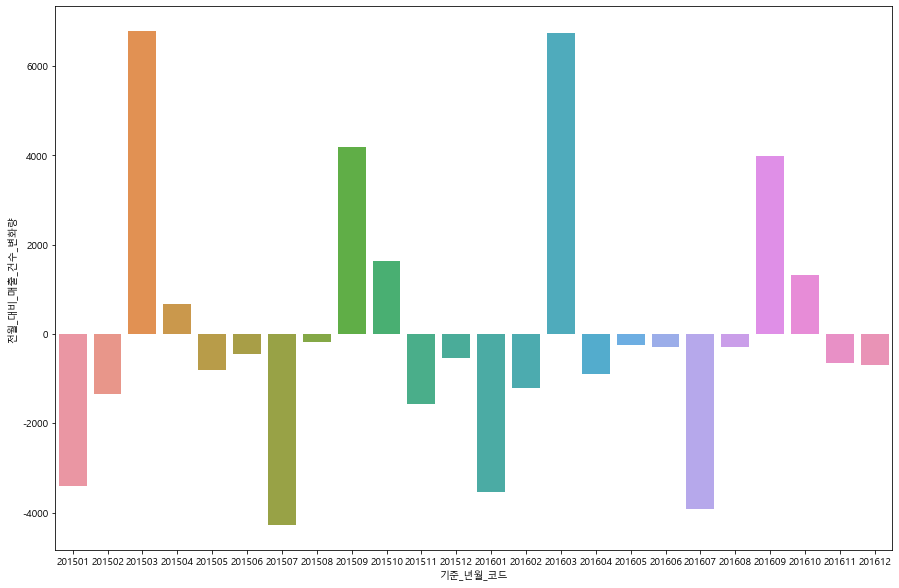

In [10]:
plt.figure(figsize=(15, 10))
sns.barplot(x="기준_년월_코드", y="전월_대비_매출_건수_변화량", data=market_df2)

---

## 2년간 상권별 매출 금액/건수 하위 5위 확인

Text(0, 0.5, '총 매출 건수')

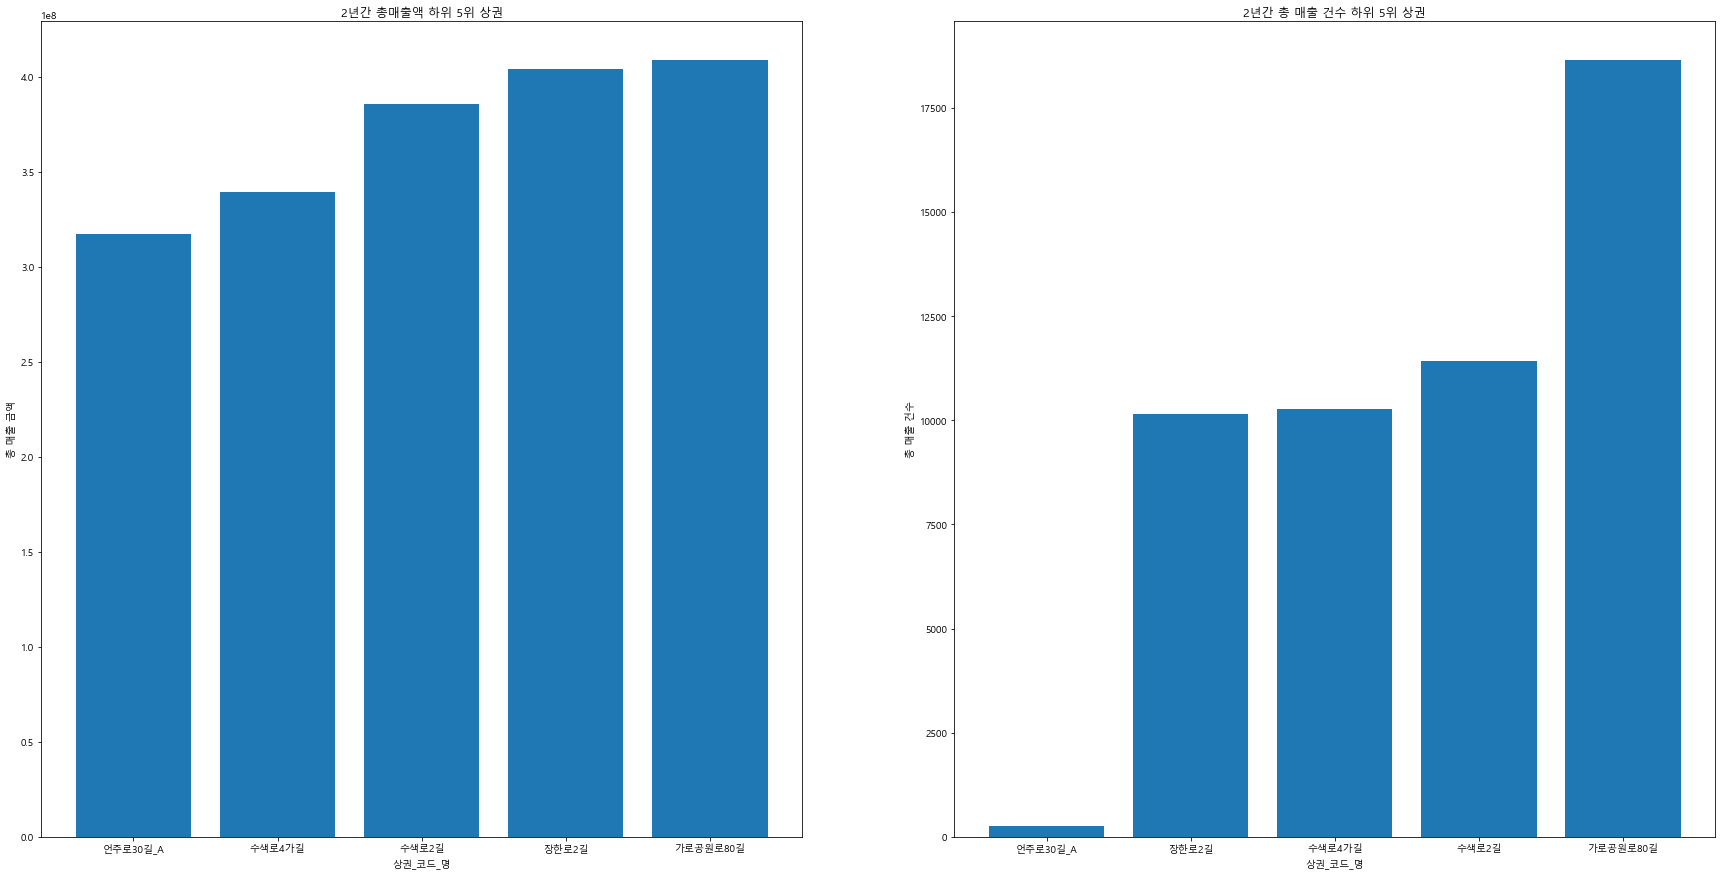

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(30, 15))

com_month_sales1 = pd.DataFrame(market_df.groupby(['상권_코드_명'])['당월_매출_금액'].sum()).sort_values(by='당월_매출_금액').reset_index().head(5)

ax[0].bar(com_month_sales1['상권_코드_명'], com_month_sales1['당월_매출_금액'])
ax[0].set_title('2년간 총매출액 하위 5위 상권')
ax[0].set_xlabel('상권_코드_명')
ax[0].set_ylabel('총 매출 금액')

count_2year1 = pd.DataFrame(market_df.groupby(['상권_코드_명'])['당월_매출_건수'].sum()).sort_values(by='당월_매출_건수').reset_index().head(5)

ax[1].bar(count_2year1['상권_코드_명'], count_2year1['당월_매출_건수'])
ax[1].set_title('2년간 총 매출 건수 하위 5위 상권')
ax[1].set_xlabel('상권_코드_명')
ax[1].set_ylabel('총 매출 건수')

### 하위 상권 업종별 비율

+ 매출금액/건수 bottom : 언주로30길_A

In [64]:
bottom_market_df = market_df[market_df["상권_코드_명"]=="언주로30길_A"].reset_index(drop=True)
bottom_market_df.tail(1)

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,ratio_index,price_index,count_index,fpop_index,work_pop_index,com_group,년도,월,점포별평균당월매출금액,점포별평균당월매출건수,전월_대비_매출_금액_변화량,전월_대비_매출_건수_변화량,전월_대비_유동인구수_변화량
5,201510,13258,언주로30길_A,CS100010,호프간이주점,86909871,60,1,1316.0,452.71,450.0,2.71,834.0,2.0,22558.0,0.400348,0.033802,0.000554,0.390351,0.131937,1,2015,10,86909871.0,60.0,19262909.5,26.0,2129.0


In [65]:
bottom_market_df1 = bottom_market_df[bottom_market_df["기준_년월_코드"]==201510]
bottom_market_df1.head()

,기준_년월_코드,상권_코드,상권_코드_명,서비스_업종_코드,서비스_업종_코드_명,당월_매출_금액,당월_매출_건수,점포,총_상주인구_수,총_가구_수,아파트_가구_수,비_아파트_가구_수,월_평균_소득_금액,집객시설_수,총_유동인구_수,ratio_index,price_index,count_index,fpop_index,work_pop_index,com_group,년도,월,점포별평균당월매출금액,점포별평균당월매출건수,전월_대비_매출_금액_변화량,전월_대비_매출_건수_변화량,전월_대비_유동인구수_변화량
5,201510,13258,언주로30길_A,CS100010,호프간이주점,86909871,60,1,1316.0,452.71,450.0,2.71,834.0,2.0,22558.0,0.400348,0.033802,0.000554,0.390351,0.131937,1,2015,10,86909871.0,60.0,19262909.5,26.0,2129.0


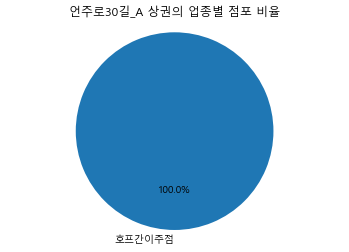

In [60]:
labels = list(bottom_market_df1["서비스_업종_코드_명"])
store = list(bottom_market_df1["점포"])

plt.pie(store, labels=labels, autopct="%1.1f%%", shadow=False, startangle=90)

plt.axis('equal')
plt.title('언주로30길_A 상권의 업종별 점포 비율')
plt.show()

### 전월 대비 매출 금액/건수 변화 파악

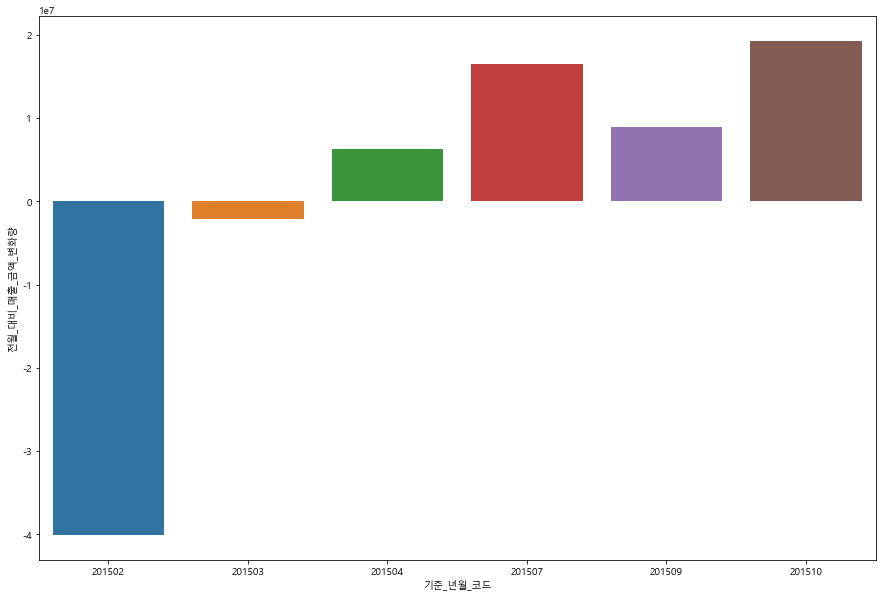

In [66]:
plt.figure(figsize=(15, 10))

sns.barplot(x="기준_년월_코드", y="전월_대비_매출_금액_변화량", data=bottom_market_df)

---

## 2년간 요식업 점포 수 변화 확인

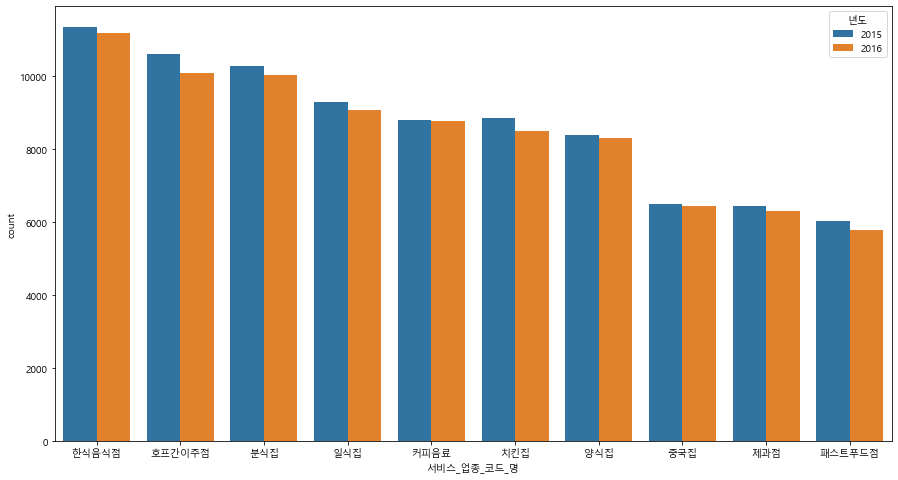

In [11]:
fig = plt.figure(figsize=(15, 8))

order = market_df['서비스_업종_코드_명'].value_counts(ascending=False).index
sns.countplot(market_df['서비스_업종_코드_명'],order=order,hue=market_df["년도"])

---

## 점포 수 vs 매출 금액 확인

In [5]:
market_df_services = market_df.groupby("서비스_업종_코드_명")["점포", "점포별평균당월매출금액"].sum()
market_df_services

,점포,점포별평균당월매출금액
서비스_업종_코드_명,,
분식집,67836,2.418994e+11
양식집,52401,2.143920e+11
일식집,52608,4.573665e+11
제과점,23498,2.633164e+11
중국집,25432,3.526021e+11
치킨집,43069,2.636358e+11
커피음료,45179,1.930959e+11
패스트푸드점,20468,2.922568e+11
한식음식점,274706,4.214586e+11


Text(0, 0.5, '서비스 업종')

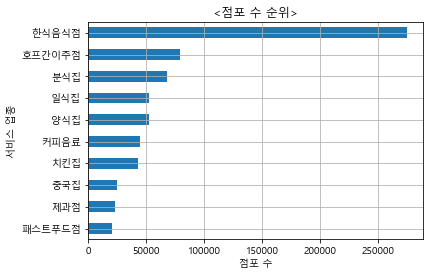

In [6]:
ax = plt.subplots()

ax = market_df_services["점포"].sort_values().plot(kind="barh", grid=True)

ax.set_title("<점포 수 순위>")
ax.set_xlabel("점포 수")
ax.set_ylabel("서비스 업종")

Text(0, 0.5, '서비스 업종')

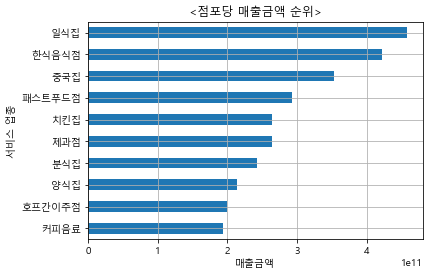

In [7]:
ax=plt.subplots()

ax = market_df_services["점포별평균당월매출금액"].sort_values().plot(kind="barh", grid=True)

ax.set_title("<점포당 매출금액 순위>")
ax.set_xlabel("매출금액")
ax.set_ylabel("서비스 업종")

---

## 점포별 당월 매출 금액/건수 상위 5위 확인

In [15]:
com_avgsales5 = market_df.groupby(['상권_코드_명'])[["점포별평균당월매출금액"]].sum().reset_index().sort_values(by="점포별평균당월매출금액", ascending=False).head(5)
com_avgsales5

,상권_코드_명,점포별평균당월매출금액
17,강남대로107길,4.413684e+10
935,화곡로68길,1.488434e+10
891,통일로_A,1.467480e+10
666,언주로30길_C,1.266716e+10
645,양재천로,1.197033e+10


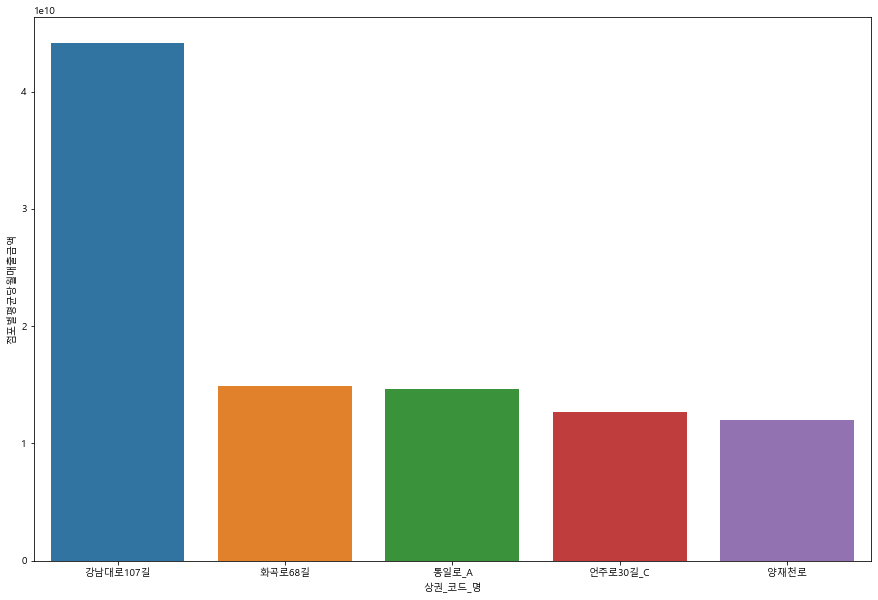

In [16]:
plt.figure(figsize=(15, 10))

sns.barplot(x="상권_코드_명", y="점포별평균당월매출금액", data=com_avgsales5)

In [17]:
com_avgcount5 = market_df.groupby(['상권_코드_명'])[["점포별평균당월매출건수"]].sum().reset_index().sort_values(by="점포별평균당월매출건수", ascending=False).head(5)
com_avgcount5

,상권_코드_명,점포별평균당월매출건수
935,화곡로68길,1.422440e+06
383,반포대로_B,1.046218e+06
279,동소문로_D,1.008496e+06
645,양재천로,9.606780e+05
666,언주로30길_C,7.023186e+05


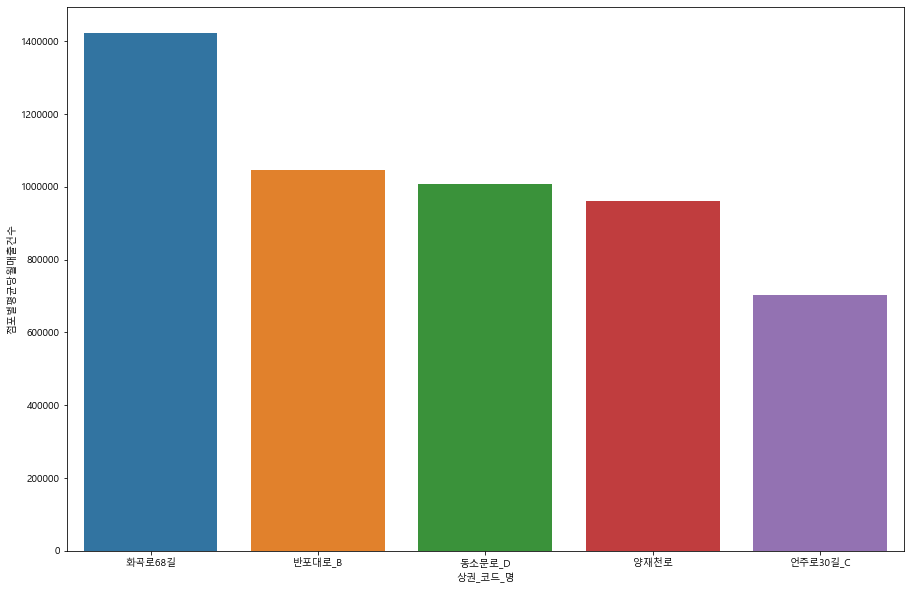

In [18]:
plt.figure(figsize=(15, 10))

sns.barplot(x="상권_코드_명", y="점포별평균당월매출건수", data=com_avgcount5)

### 상위 상권 업종별 점포 비율

+ 점포별 매출금액 top : 강남대로107길
+ 점포별 매출건수 top : 화곡로68길

In [19]:
com_store = market_df[["기준_년월_코드", "상권_코드_명", "서비스_업종_코드_명", "점포"]]
com_store.head()

,기준_년월_코드,상권_코드_명,서비스_업종_코드_명,점포
0,201501,당산로44길,한식음식점,2
1,201501,당산로44길,양식집,1
2,201501,당산로44길,분식집,1
3,201501,당산로44길,패스트푸드점,2
4,201501,당산로44길,제과점,2


In [20]:
com_store1 = com_store[com_store["상권_코드_명"]=='강남대로107길']
com_store1 = com_store1[com_store["기준_년월_코드"]==201611]
com_store1

C:\Users\HGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,기준_년월_코드,상권_코드_명,서비스_업종_코드_명,점포
160577,201611,강남대로107길,한식음식점,6
160578,201611,강남대로107길,중국집,1
160579,201611,강남대로107길,일식집,1
160580,201611,강남대로107길,커피음료,1


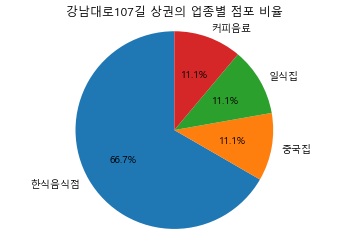

In [21]:
labels = list(com_store1["서비스_업종_코드_명"])
store = list(com_store1["점포"])

plt.pie(store, labels=labels, autopct="%1.1f%%", shadow=False, startangle=90)

plt.axis('equal')
plt.title('강남대로107길 상권의 업종별 점포 비율')
plt.show()

In [22]:
com_store2 = com_store[com_store["상권_코드_명"]=='화곡로68길']
com_store2 = com_store2[com_store["기준_년월_코드"]==201611]
com_store2

C:\Users\HGH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,기준_년월_코드,상권_코드_명,서비스_업종_코드_명,점포
159060,201611,화곡로68길,한식음식점,12
159061,201611,화곡로68길,일식집,2
159062,201611,화곡로68길,양식집,3
159063,201611,화곡로68길,분식집,1
159064,201611,화곡로68길,패스트푸드점,1
159065,201611,화곡로68길,치킨집,1
159066,201611,화곡로68길,커피음료,3


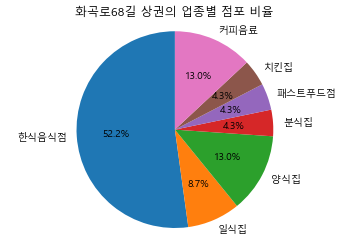

In [23]:
labels = list(com_store2["서비스_업종_코드_명"])
store = list(com_store2["점포"])

plt.pie(store, labels=labels, autopct="%1.1f%%", shadow=False, startangle=90)

plt.axis('equal')
plt.title('화곡로68길 상권의 업종별 점포 비율')
plt.show()

---

## 군집별 특성 파악

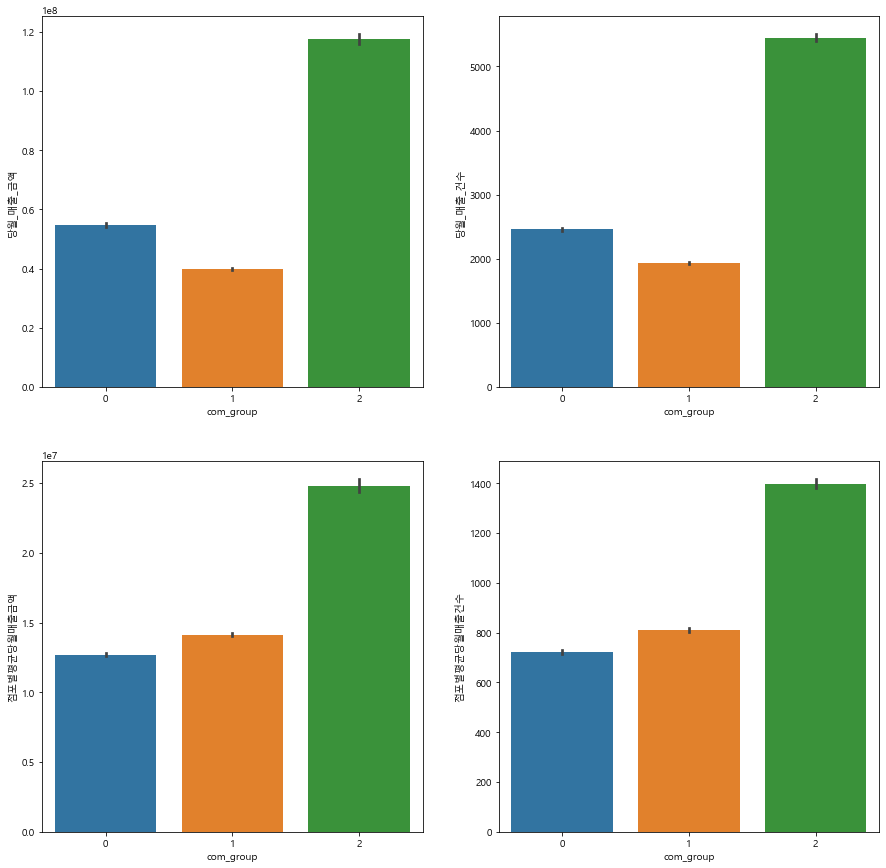

In [24]:
fig, axs = plt.subplots(2, 2, figsize = (15, 15))

sns.barplot(x=market_df["com_group"], y=market_df["당월_매출_금액"], ax = axs[0][0])
sns.barplot(x=market_df["com_group"], y=market_df["당월_매출_건수"], ax = axs[0][1])
sns.barplot(x=market_df["com_group"], y=market_df["점포별평균당월매출금액"], ax = axs[1][0])
sns.barplot(x=market_df["com_group"], y=market_df["점포별평균당월매출건수"], ax = axs[1][1])

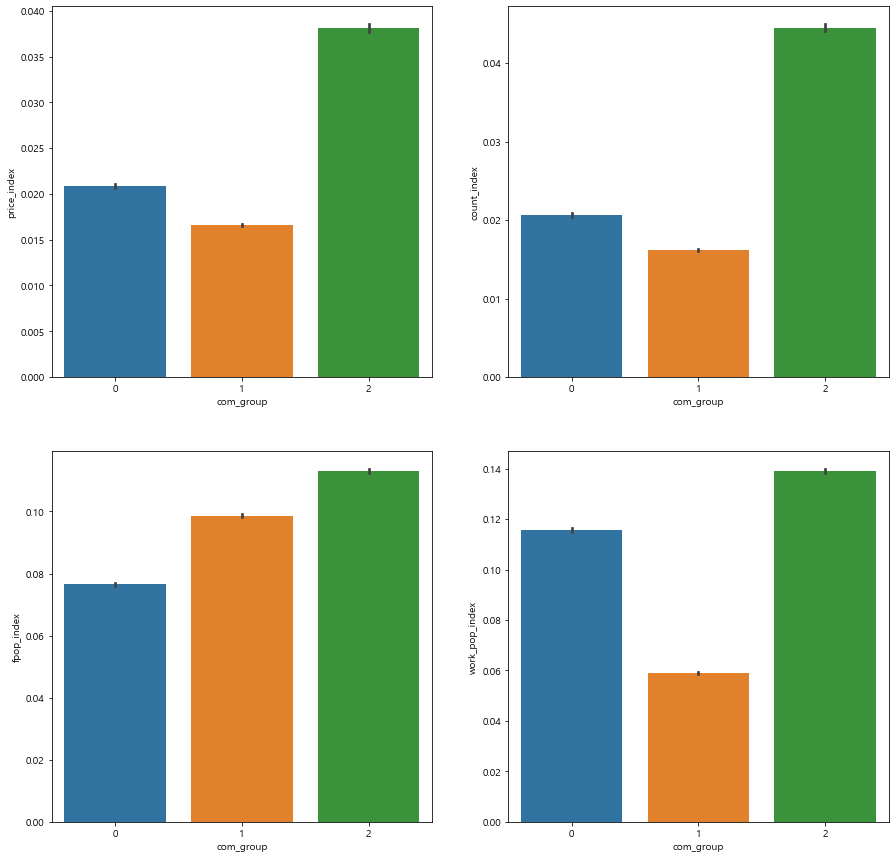

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

sns.barplot(x=market_df["com_group"], y=market_df["price_index"], ax=axs[0][0])
sns.barplot(x=market_df["com_group"], y=market_df["count_index"], ax=axs[0][1])
sns.barplot(x=market_df["com_group"], y=market_df["fpop_index"], ax=axs[1][0])
sns.barplot(x=market_df["com_group"], y=market_df["work_pop_index"], ax=axs[1][1])

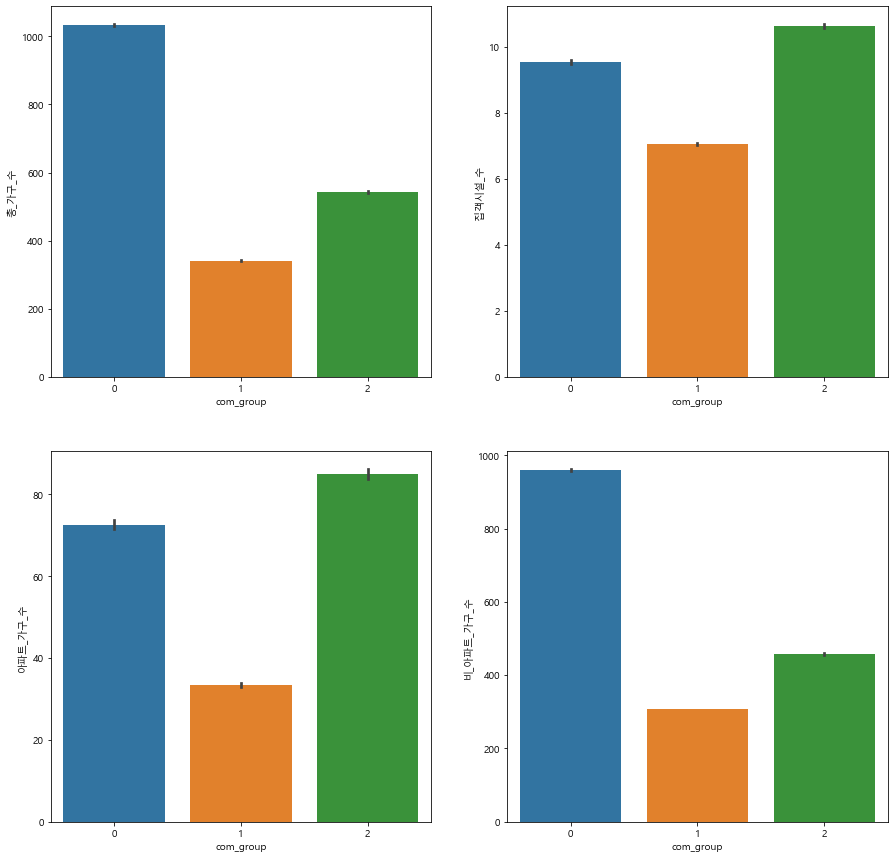

In [26]:
fig, axs = plt.subplots(2, 2, figsize = (15, 15))

sns.barplot(x=market_df["com_group"], y=market_df["총_가구_수"], ax = axs[0][0])
sns.barplot(x=market_df["com_group"], y=market_df["집객시설_수"], ax = axs[0][1])
sns.barplot(x=market_df["com_group"], y=market_df["아파트_가구_수"], ax = axs[1][0])
sns.barplot(x=market_df["com_group"], y=market_df["비_아파트_가구_수"], ax = axs[1][1])

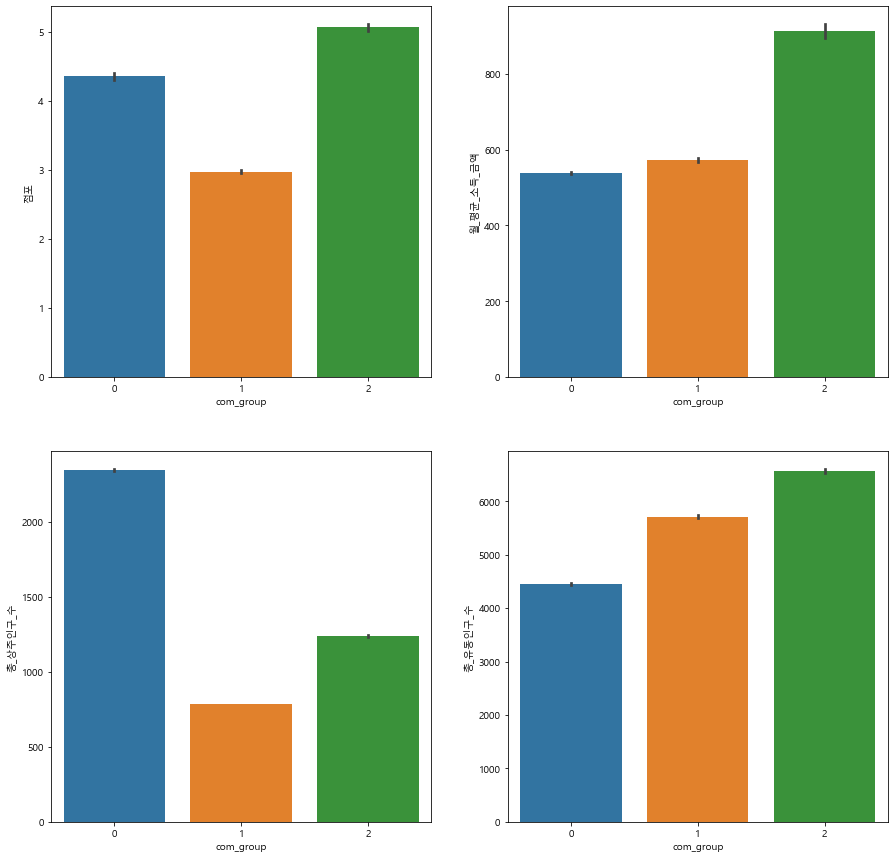

In [33]:
fig, axs = plt.subplots(2, 2, figsize = (15, 15))

sns.barplot(x=market_df["com_group"], y=market_df["점포"], ax=axs[0][0])
sns.barplot(x=market_df["com_group"], y=market_df["월_평균_소득_금액"], ax=axs[0][1])
sns.barplot(x=market_df["com_group"], y=market_df["총_상주인구_수"], ax = axs[1][0])
sns.barplot(x=market_df["com_group"], y=market_df["총_유동인구_수"], ax = axs[1][1])